In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import re

demos=pd.read_csv('demographics.csv')
demos.drop(demos[demos['Season']==2016].index, inplace=True)
demos.drop(columns='Unnamed: 0', inplace=True, axis=1)
demos.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6319 entries, 0 to 6669
Data columns (total 95 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      6319 non-null   int64  
 1   TeamName    6319 non-null   object 
 2   Size        6319 non-null   float64
 3   SizeRank    6319 non-null   float64
 4   Hgt5        6319 non-null   float64
 5   Hgt5Rank    6319 non-null   float64
 6   Hgt4        6319 non-null   float64
 7   Hgt4Rank    6319 non-null   float64
 8   Hgt3        6319 non-null   float64
 9   Hgt3Rank    6319 non-null   float64
 10  Hgt2        6319 non-null   float64
 11  Hgt2Rank    6319 non-null   float64
 12  Hgt1        6319 non-null   float64
 13  Hgt1Rank    6319 non-null   float64
 14  HgtEff      6319 non-null   float64
 15  HgtEffRank  6319 non-null   float64
 16  Exp         6319 non-null   float64
 17  ExpRank     6319 non-null   float64
 18  Bench       6319 non-null   float64
 19  BenchRank   6319 non-null   floa

I notice that for 2016, the column contain the names of positions instead of numbers. I am going to use height16edits.ipynb to make changes to that year and re-insert the data.

In [2]:
sixteen=pd.read_csv('sixteen.csv')
sixteen=sixteen.drop(columns='Unnamed: 0',axis=1)
print(demos.columns)
print(sixteen.columns)

Index(['Season', 'TeamName', 'Size', 'SizeRank', 'Hgt5', 'Hgt5Rank', 'Hgt4',
       'Hgt4Rank', 'Hgt3', 'Hgt3Rank', 'Hgt2', 'Hgt2Rank', 'Hgt1', 'Hgt1Rank',
       'HgtEff', 'HgtEffRank', 'Exp', 'ExpRank', 'Bench', 'BenchRank', 'Pts5',
       'Pts5Rank', 'Pts4', 'Pts4Rank', 'Pts3', 'Pts3Rank', 'Pts2', 'Pts2Rank',
       'Pts1', 'Pts1Rank', 'OR5', 'OR5Rank', 'OR4', 'OR4Rank', 'OR3',
       'OR3Rank', 'OR2', 'OR2Rank', 'OR1', 'OR1Rank', 'DR5', 'DR5Rank', 'DR4',
       'DR4Rank', 'DR3', 'DR3Rank', 'DR2', 'DR2Rank', 'DR1', 'DR1Rank',
       'Height', 'RankHeight', 'HgtC', 'RankHgtC', 'HgtPF', 'RankHgtPF',
       'HgtSF', 'RankHgtSF', 'HgtSG', 'RankHgtSG', 'HgtPG', 'RankHgtPG',
       'RankHgtEff', 'RankExp', 'RankBench', 'PtsC', 'RankPtsC', 'PtsPF',
       'RankPtsPF', 'PtsSF', 'RankPtsSF', 'PtsSG', 'RankPtsSG', 'PtsPG',
       'RankPtsPG', 'ORC', 'RankORC', 'ORPF', 'RankORPF', 'ORSF', 'RankORSF',
       'ORSG', 'RankORSG', 'ORPG', 'RankORPG', 'DRC', 'RankDRC', 'DRPF',
       'RankDRPF', 'D

In [3]:

cols_sixteen = set(sixteen.columns)
cols_demos = set(demos.columns)

only_in_sixteen = cols_sixteen - cols_demos
only_in_demos = cols_demos - cols_sixteen

print("Columns in sixteen but not in demos:", only_in_sixteen)
print("Columns in demos but not in sixteen:", only_in_demos)
demos=demos.drop(columns=only_in_demos, axis=1)

Columns in sixteen but not in demos: set()
Columns in demos but not in sixteen: {'RankDRPF', 'PtsSG', 'DRSF', 'HgtPF', 'RankHgtC', 'DRPF', 'RankHgtPF', 'ORSF', 'ORSG', 'HgtSG', 'RankExp', 'ORPF', 'RankHgtEff', 'HgtSF', 'ORPG', 'RankDRSF', 'Height', 'DRPG', 'RankORSF', 'RankORPF', 'PtsPF', 'RankORC', 'RankDRPG', 'RankORPG', 'PtsSF', 'RankHgtSG', 'RankPtsSG', 'ORC', 'RankPtsC', 'DRC', 'HgtPG', 'RankDRC', 'PtsPG', 'RankHgtPG', 'RankORSG', 'RankHgtSF', 'RankDRSG', 'RankPtsPF', 'RankPtsSF', 'DRSG', 'RankHeight', 'RankBench', 'HgtC', 'PtsC', 'RankPtsPG'}


In [4]:
demos.head()

,Season,TeamName,Size,SizeRank,Hgt5,Hgt5Rank,Hgt4,Hgt4Rank,Hgt3,Hgt3Rank,...,DR5,DR5Rank,DR4,DR4Rank,DR3,DR3Rank,DR2,DR2Rank,DR1,DR1Rank
0,2025,Abilene Christian,77.28,169.0,-0.45,222.0,-0.87,285.0,-0.27,225.0,...,20.66,328.0,25.39,109.0,23.14,68.0,16.00,190.0,14.81,160.0
1,2025,Air Force,78.15,49.0,1.20,59.0,-0.30,217.0,-0.11,193.0,...,17.11,355.0,16.47,347.0,22.13,89.0,24.68,7.0,19.58,30.0
2,2025,Akron,75.13,361.0,-1.92,346.0,-3.29,364.0,-2.11,356.0,...,32.80,20.0,19.57,297.0,19.65,160.0,16.05,186.0,11.85,298.0
3,2025,Alabama,78.09,59.0,1.61,33.0,3.13,1.0,0.42,124.0,...,27.43,141.0,29.41,26.0,19.94,147.0,11.80,334.0,11.37,314.0
4,2025,Alabama A&M,76.68,267.0,0.54,129.0,-0.23,206.0,-0.69,278.0,...,22.05,295.0,24.22,152.0,16.86,266.0,20.77,37.0,16.00,108.0


In [5]:
demofinal=pd.merge(sixteen, demos, on=['Season','TeamName','Size','SizeRank','Hgt5','Hgt5Rank','Hgt4','Hgt4Rank','Hgt3','Hgt3Rank','Hgt2','Hgt2Rank','Hgt1','Hgt1Rank','HgtEff','HgtEffRank','Exp','ExpRank','Bench','BenchRank','Pts5','Pts5Rank','Pts4','Pts4Rank','Pts3','Pts3Rank','Pts2','Pts2Rank','Pts1','Pts1Rank','OR5','OR5Rank','OR4','OR4Rank','OR3','OR3Rank','OR2','OR2Rank','OR1','OR1Rank','DR5','DR5Rank','DR4','DR4Rank','DR3','DR3Rank','DR2','DR2Rank','DR1','DR1Rank'], how='outer')

In [6]:
demofinal.to_csv('finalheights.csv')

In [7]:
demofinal=pd.read_csv('finalheights.csv')

In [8]:
demofinal=demofinal[demofinal.columns.drop(list(demofinal.filter(regex='Rank')))]
demofinal.head()

,Unnamed: 0,Season,TeamName,Size,Hgt5,Hgt4,Hgt3,Hgt2,Hgt1,HgtEff,...,OR5,OR4,OR3,OR2,OR1,DR5,DR4,DR3,DR2,DR1
0,0,2007,Air Force,77.00,-0.69,-0.06,1.07,1.32,2.47,-0.75,...,21.74,25.11,18.12,24.00,11.03,23.29,24.96,18.92,14.67,18.17
1,1,2007,Akron,75.76,-1.52,0.47,-2.08,-1.85,0.47,-1.05,...,27.05,28.40,31.45,7.71,5.38,22.97,24.52,28.40,12.05,12.05
2,2,2007,Alabama,77.65,0.52,0.26,2.07,1.39,0.31,0.78,...,23.41,37.60,22.21,11.41,5.36,32.71,29.21,17.16,12.68,8.24
3,3,2007,Alabama A&M,77.01,1.75,-1.17,0.07,1.15,1.47,0.58,...,25.17,29.00,11.99,15.91,17.92,34.37,21.22,13.70,15.21,15.49
4,4,2007,Alabama St.,76.28,-1.16,-0.26,1.07,1.20,-1.53,-1.42,...,28.95,30.34,17.95,17.56,5.20,29.66,24.80,14.84,13.82,16.88


In [ ]:
demofinal.drop(columns='Unnamed: 0')

In [ ]:
demofinal.info()

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/1264671601.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax=plt.subplots()


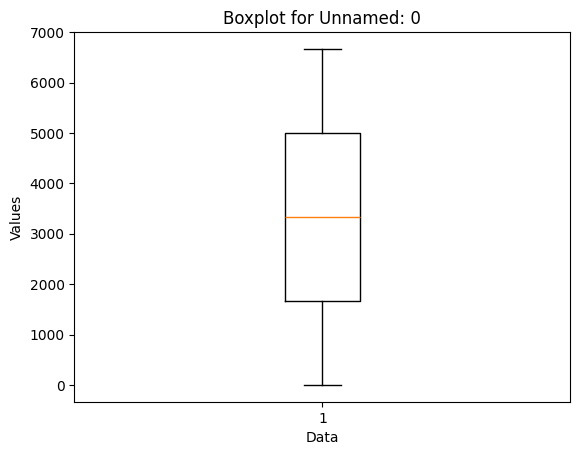

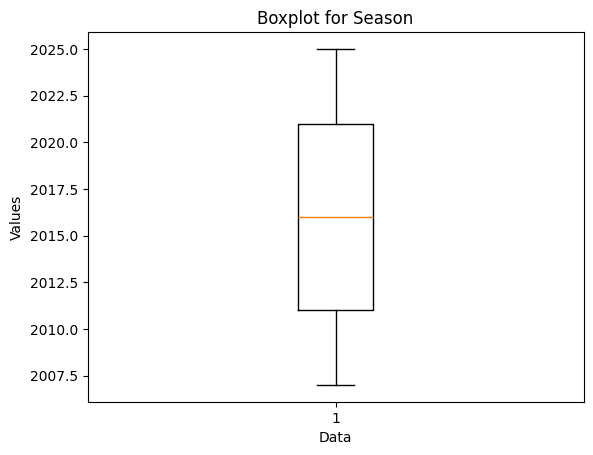

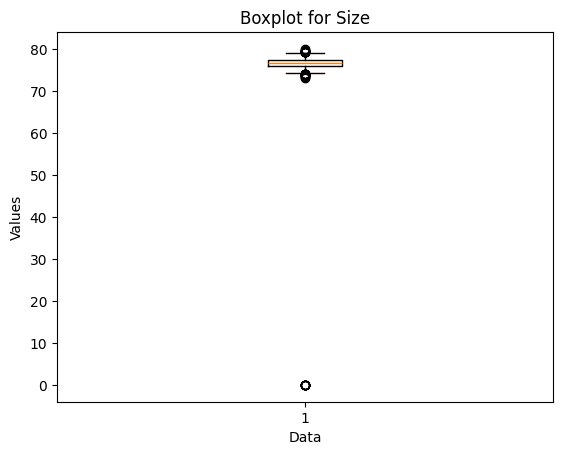

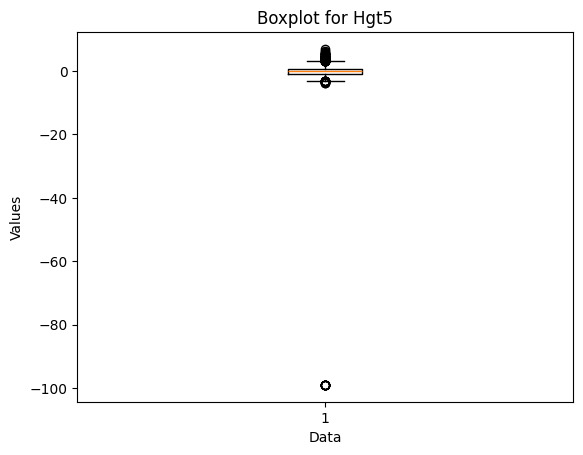

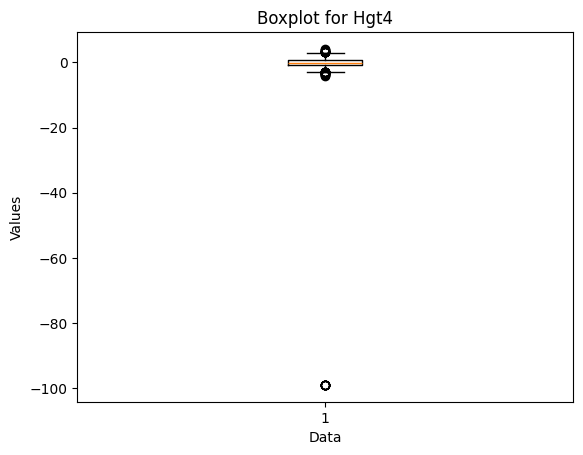

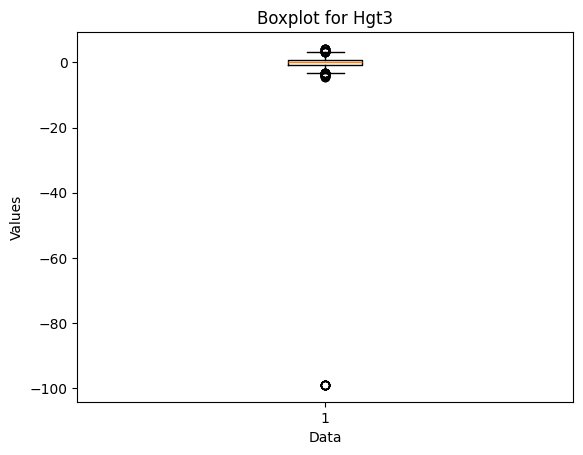

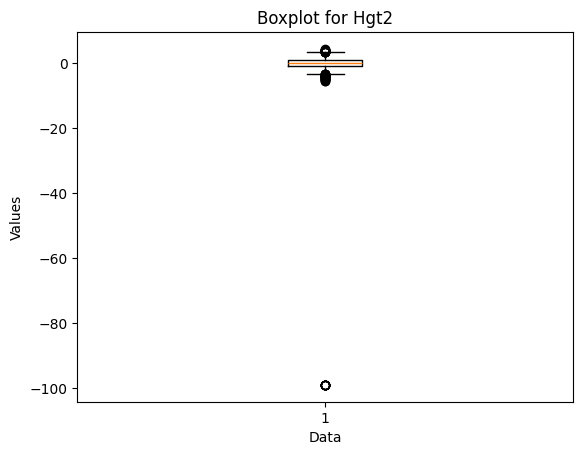

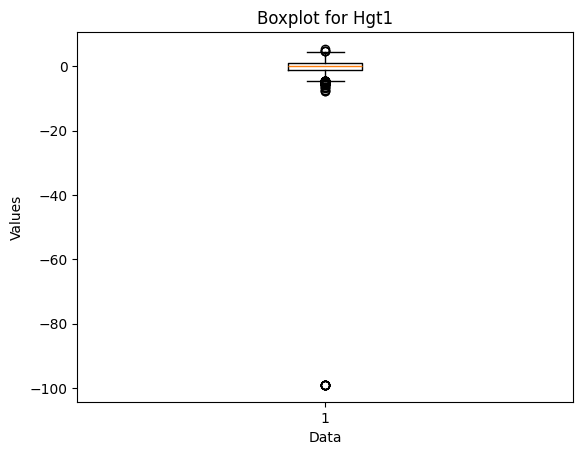

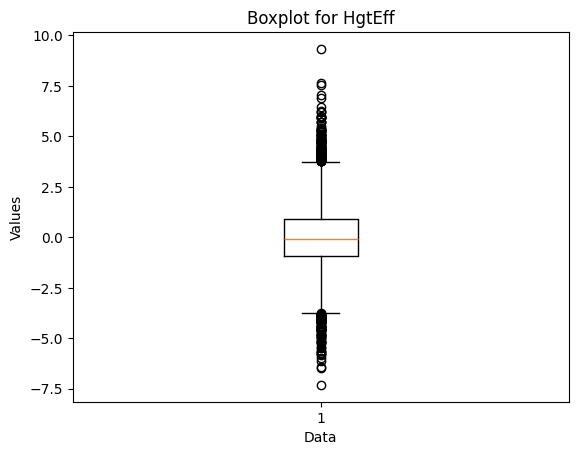

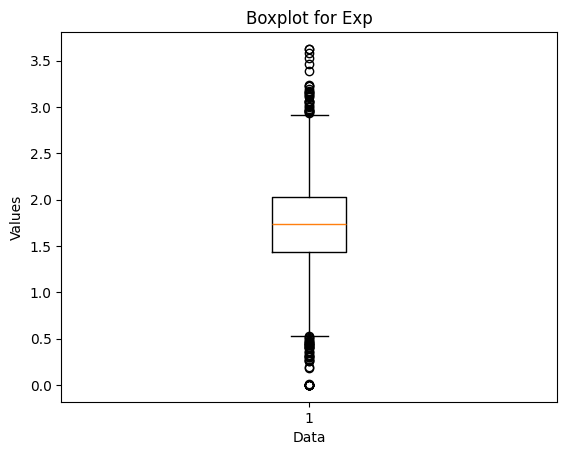

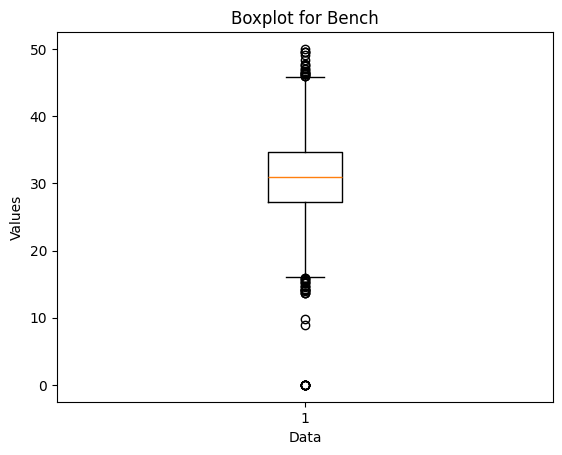

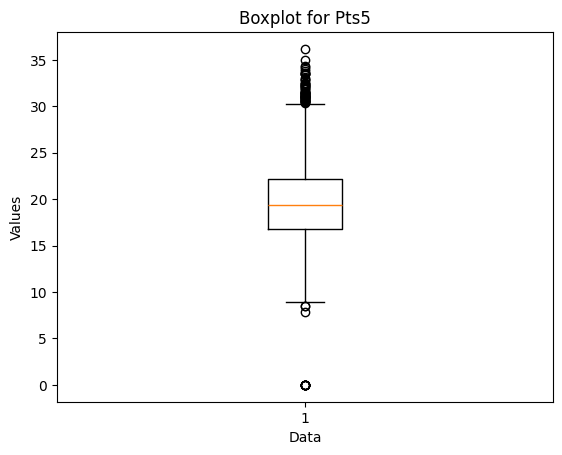

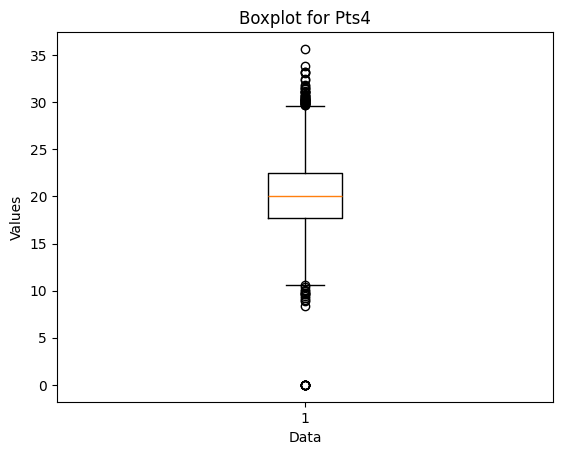

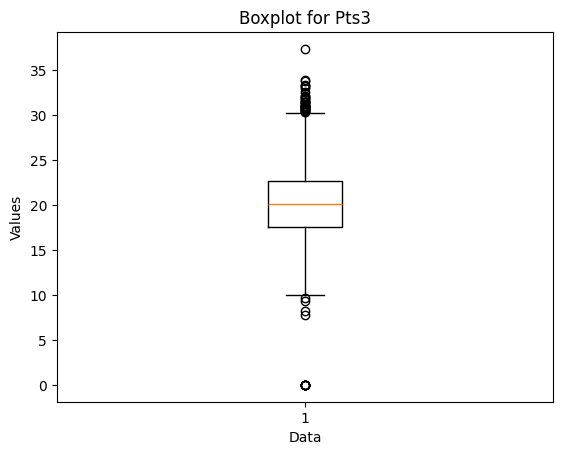

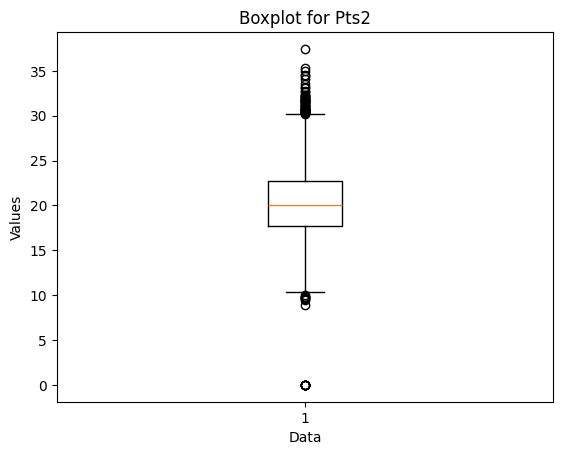

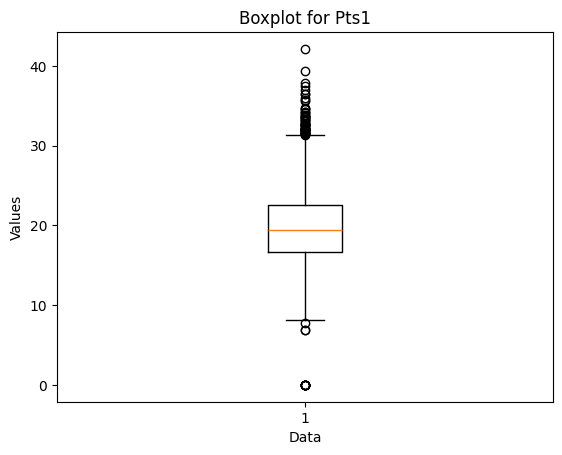

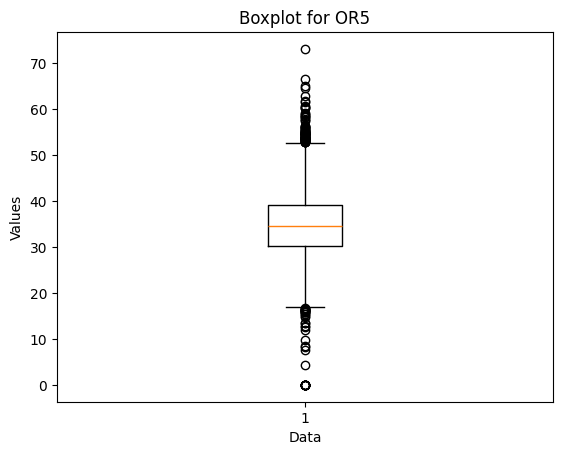

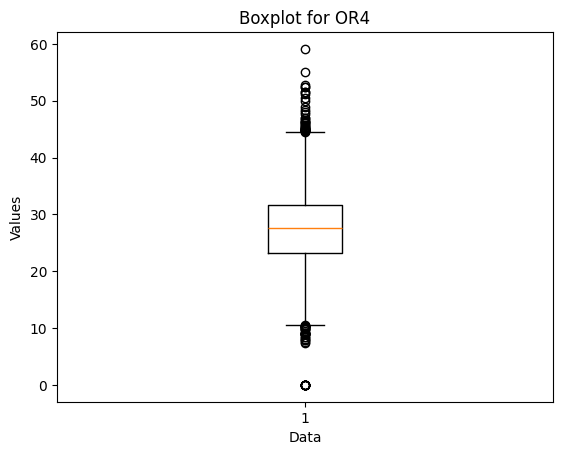

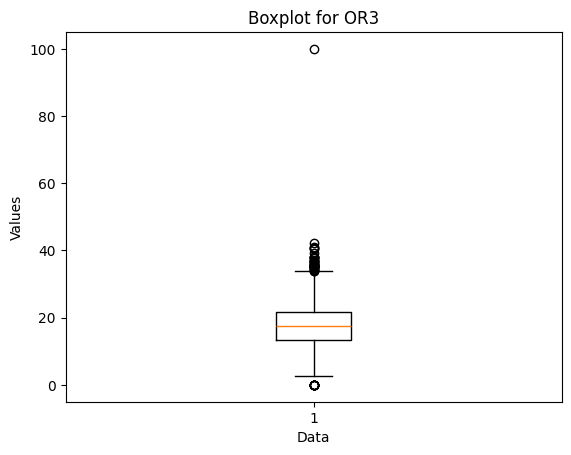

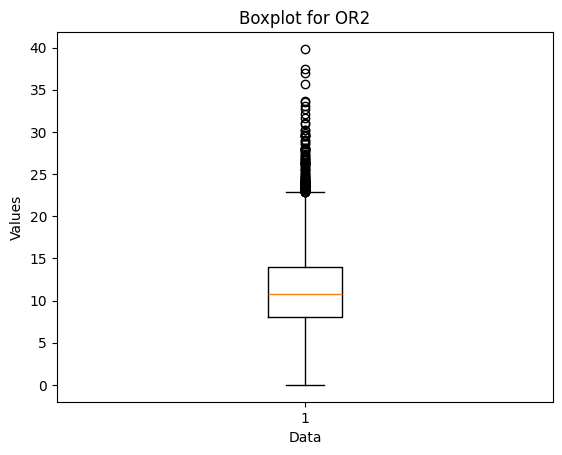

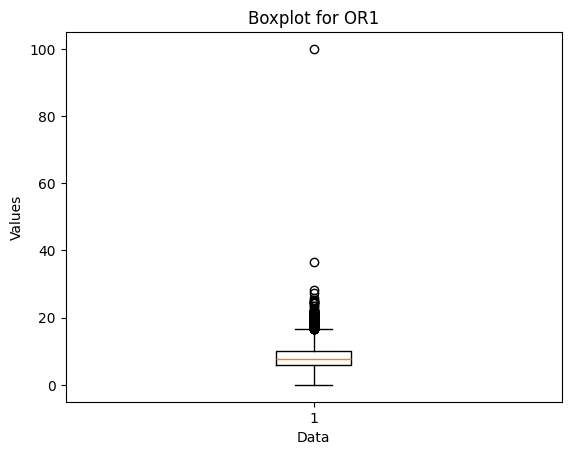

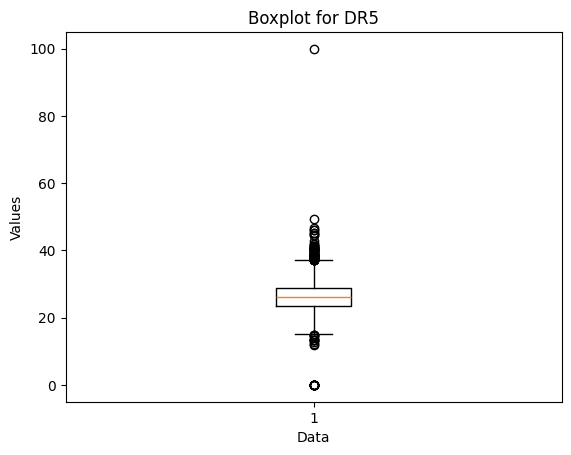

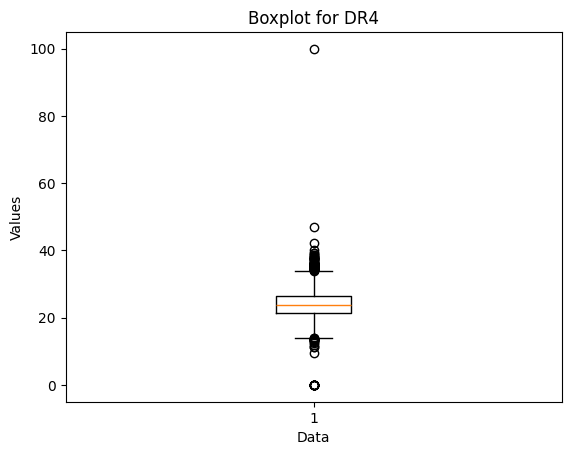

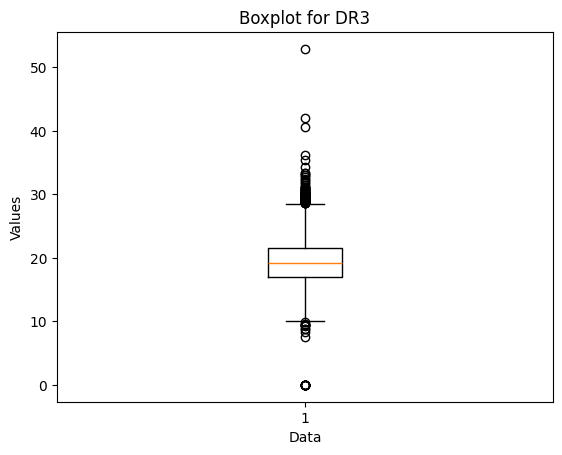

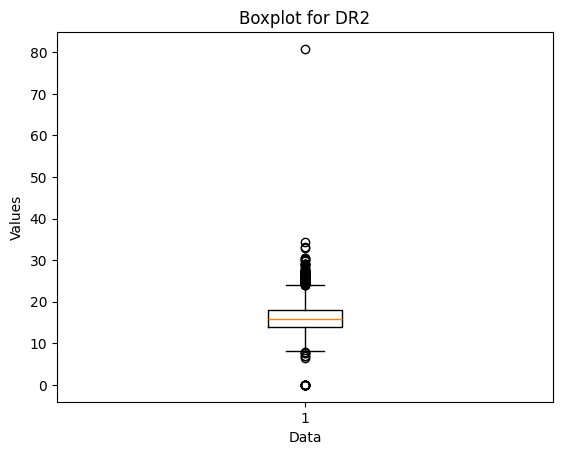

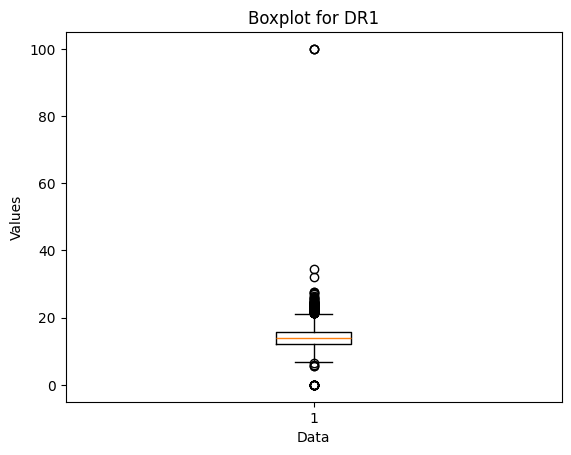

In [10]:
numerical=demofinal.select_dtypes(exclude='object')
for col in numerical:
    fig, ax=plt.subplots()
    ax.boxplot(numerical[col])
    ax.set_title(f'Boxplot for {col}')
    ax.set_xlabel('Data')
    ax.set_ylabel('Values')
plt.show()

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


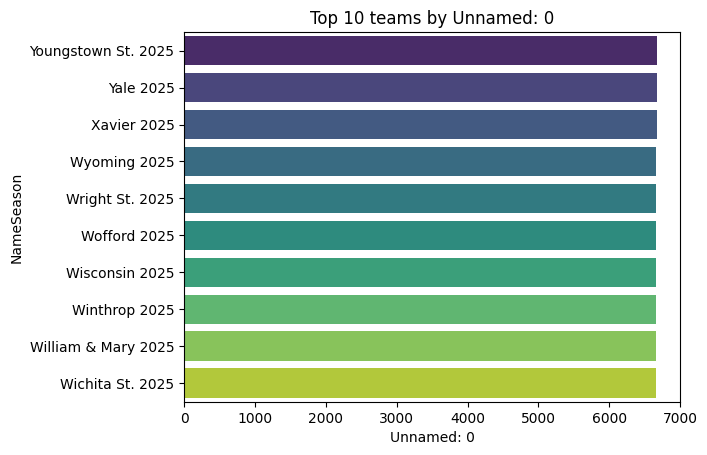

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


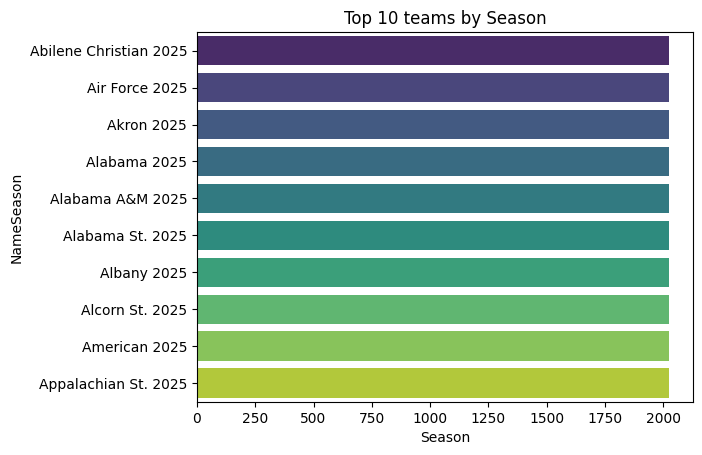

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


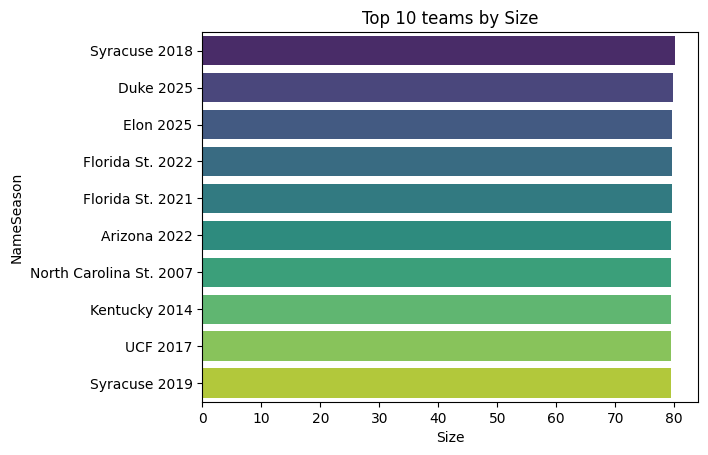

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


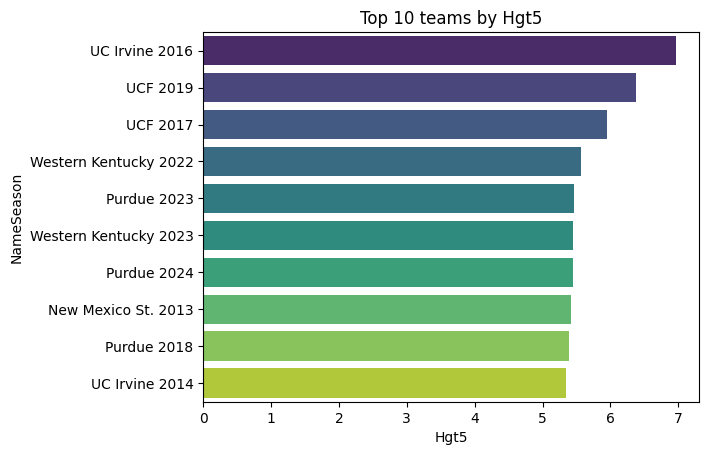

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


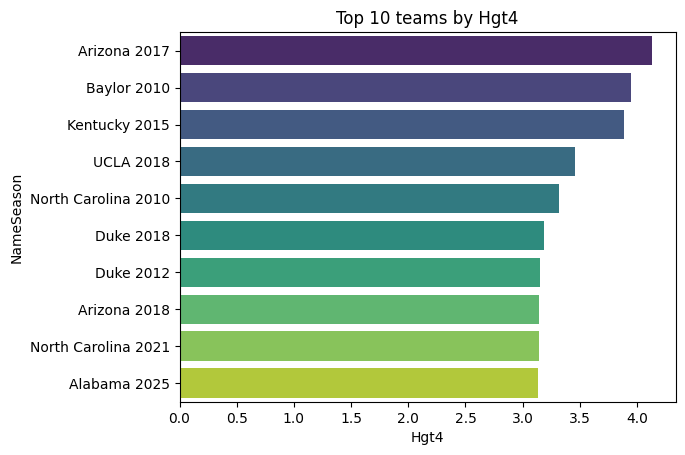

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


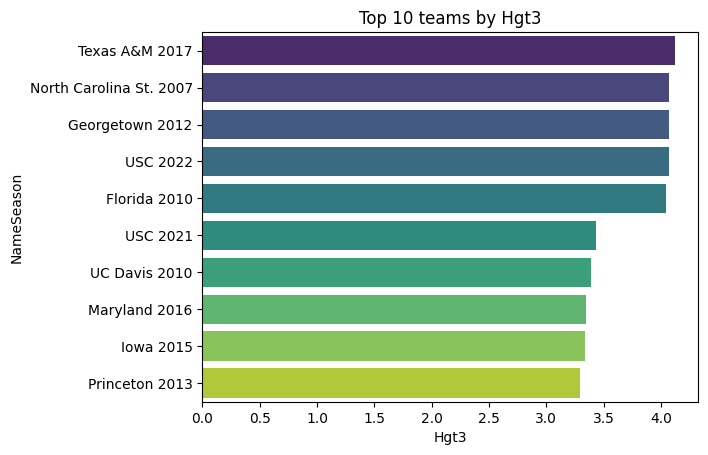

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


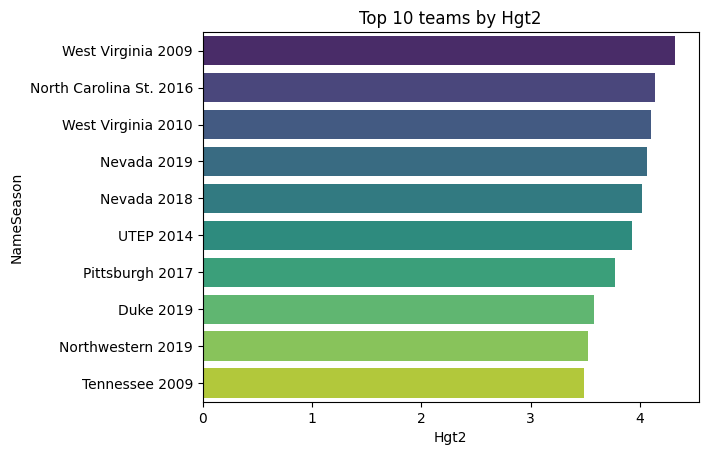

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


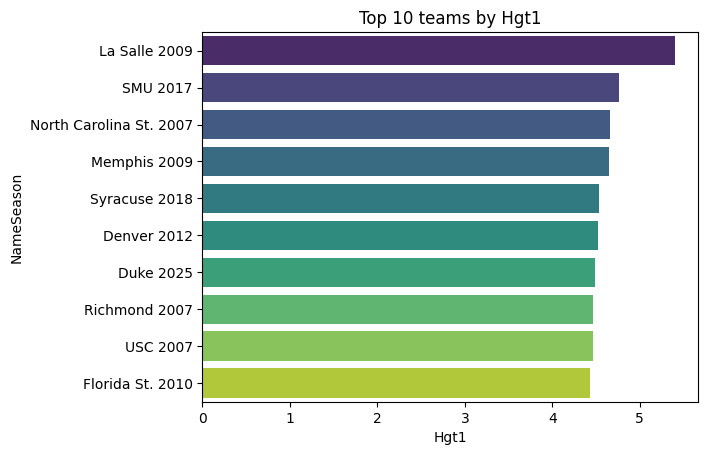

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


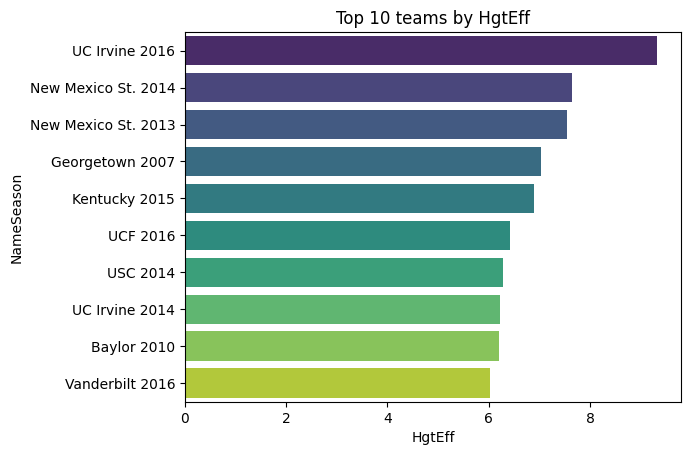

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


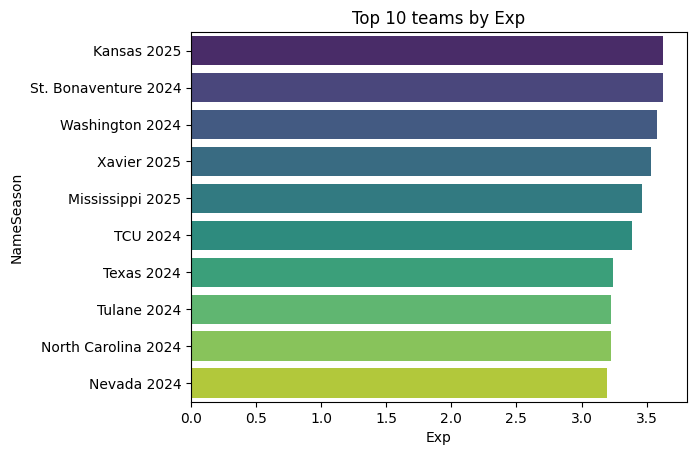

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


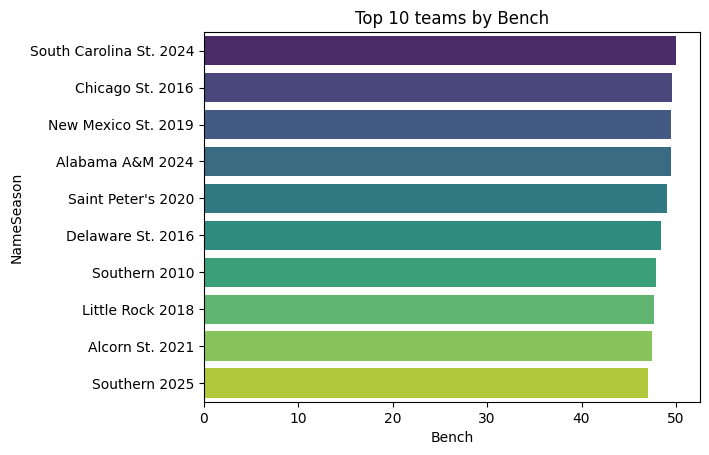

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


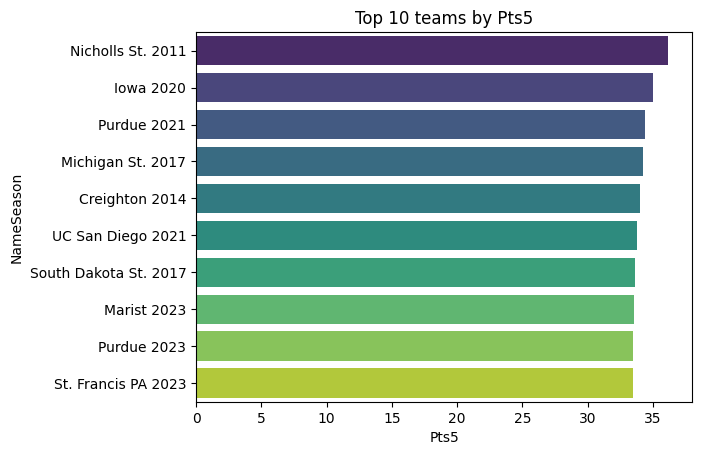

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


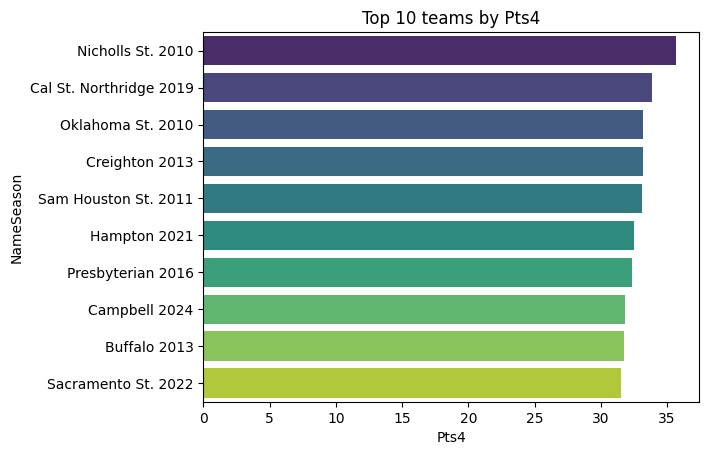

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


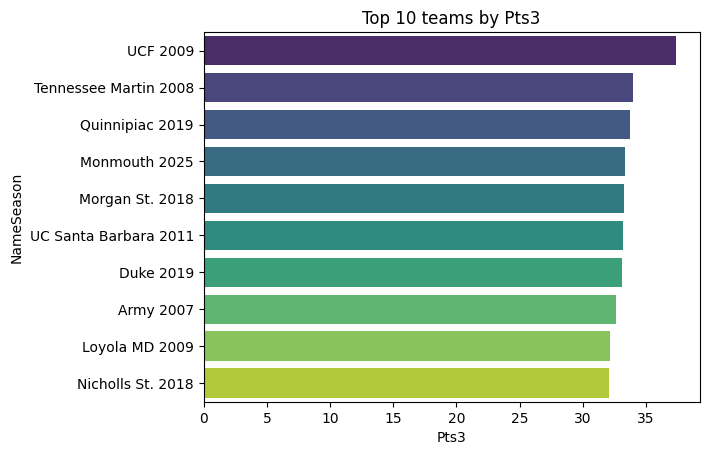

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


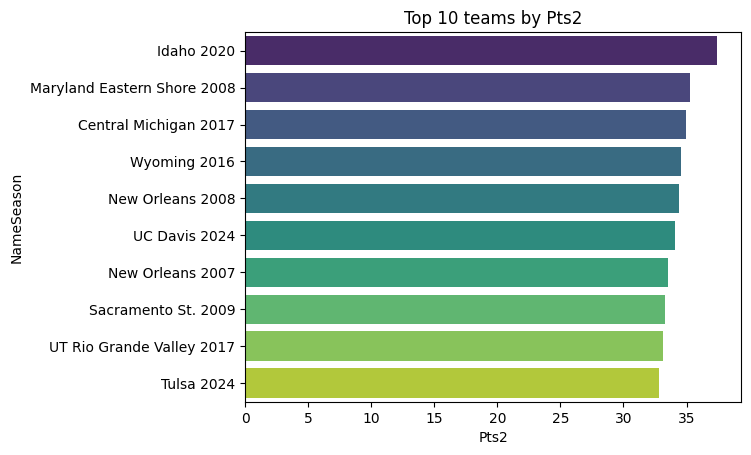

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


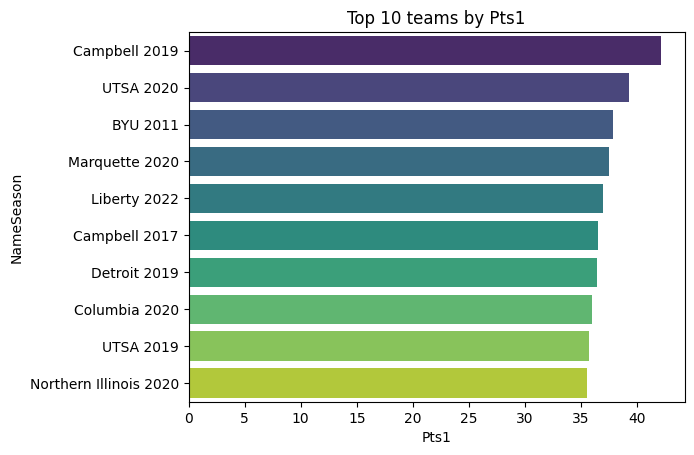

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


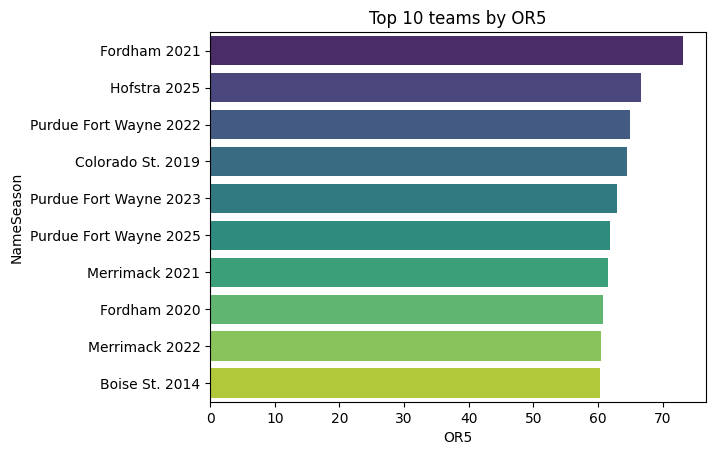

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


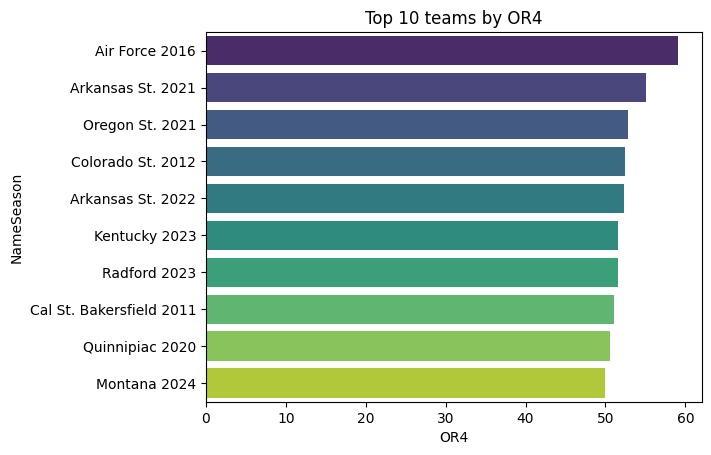

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


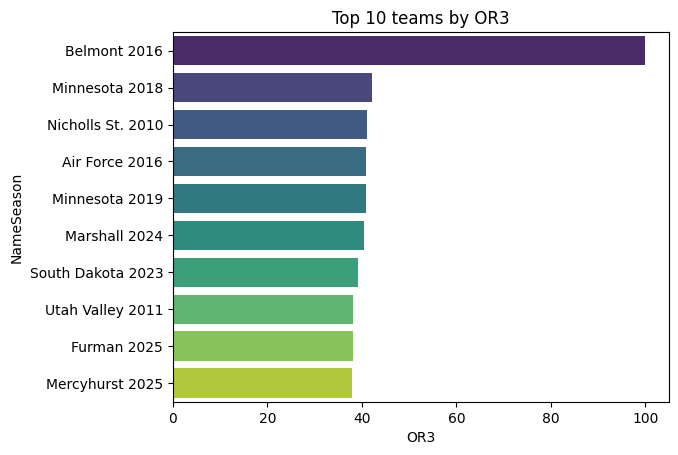

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


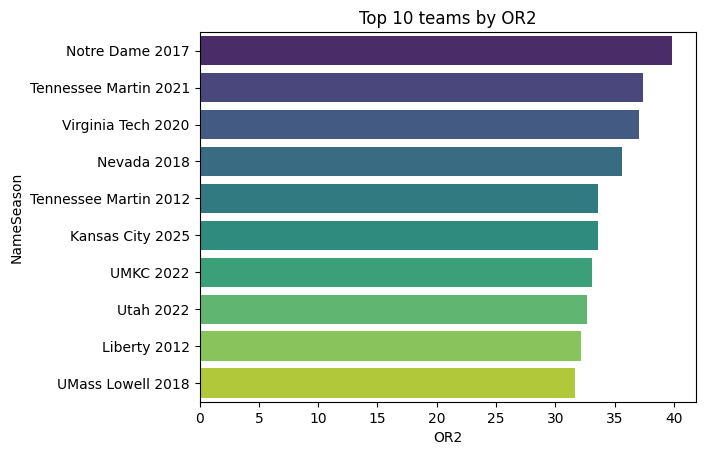

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


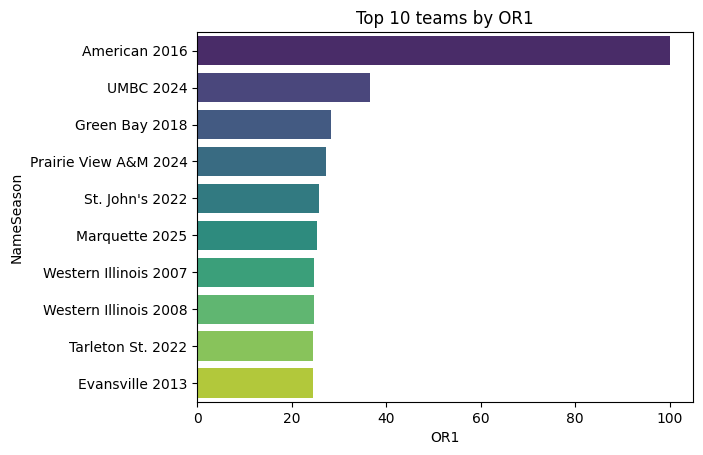

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


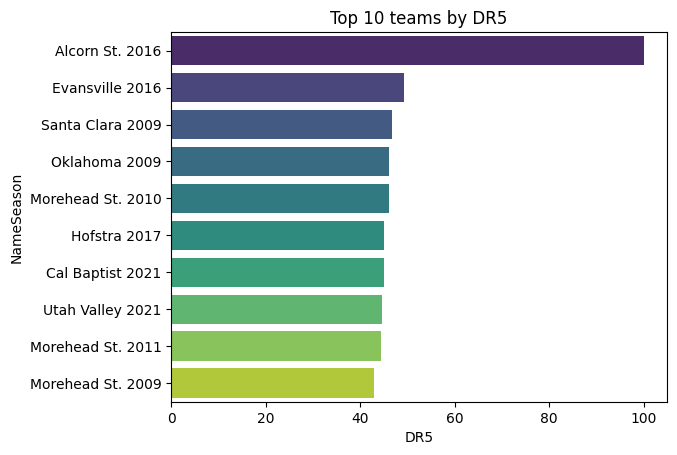

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


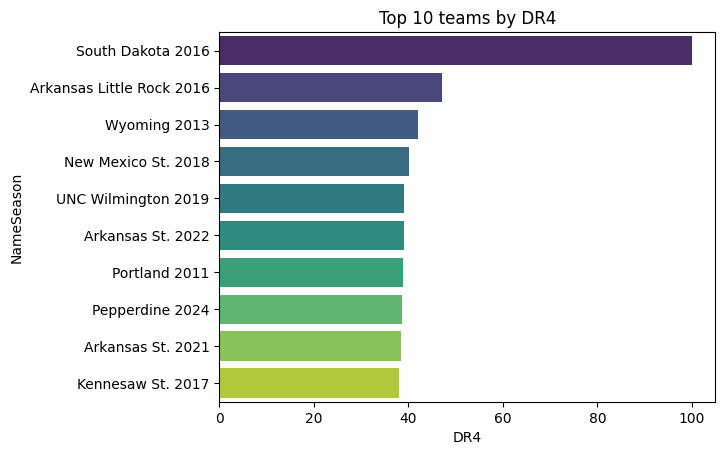

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


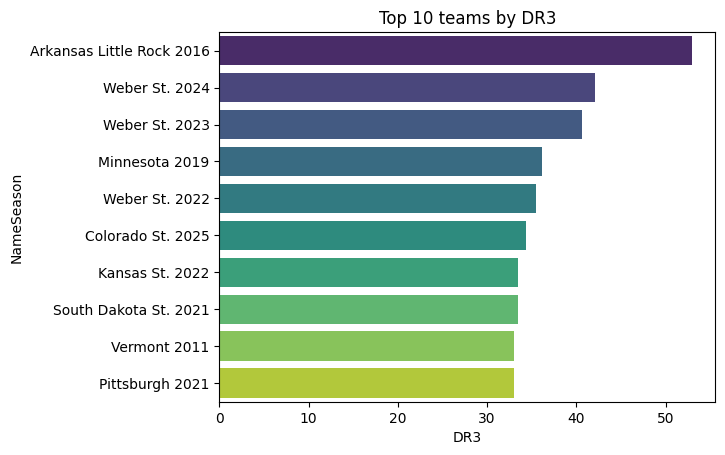

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


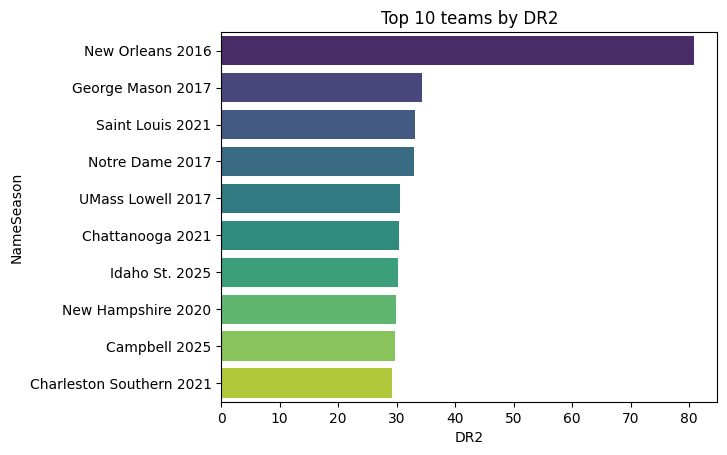

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_36215/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


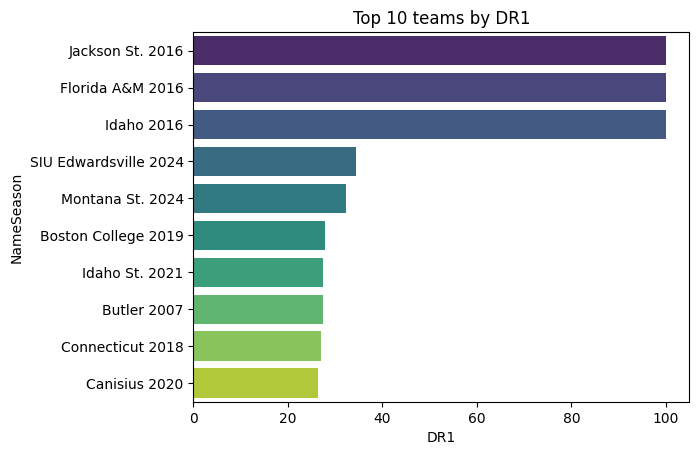

In [11]:
for col in numerical:
    top_10=demofinal.nlargest(10, col)
    for index,row in top_10.iterrows():
        top_10.at[index, 'NameSeason']= f"{row['TeamName']} {row['Season']}"
    sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')
    plt.title(f'Top 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()


In [ ]:
for col in numerical:
    top_10=demofinal.nsmallest(10, col)
    for index,row in top_10.iterrows():
        top_10.at[index, 'NameSeason']= f"{row['TeamName']} {row['Season']}"
    sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')
    plt.title(f'Top 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()

We run into the same problem as before with teams that opted out of the pandemic year.
Because those teams do not have rosters (and therefore Size values of 0.0), we can easily drop them.

In [59]:
demofinal=demofinal[demofinal['Size'] > 0.0]

In [ ]:
demofinal.info()

Correlation Analysis

In [ ]:
correlators=numerical
pearson=correlators.corr(method='pearson')
spearman=correlators.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(spearman, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()